In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Load the MNIST dataset

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Visualize the dataset

Target labels:  [2 1 6 9 6 1 3 4 1 1]


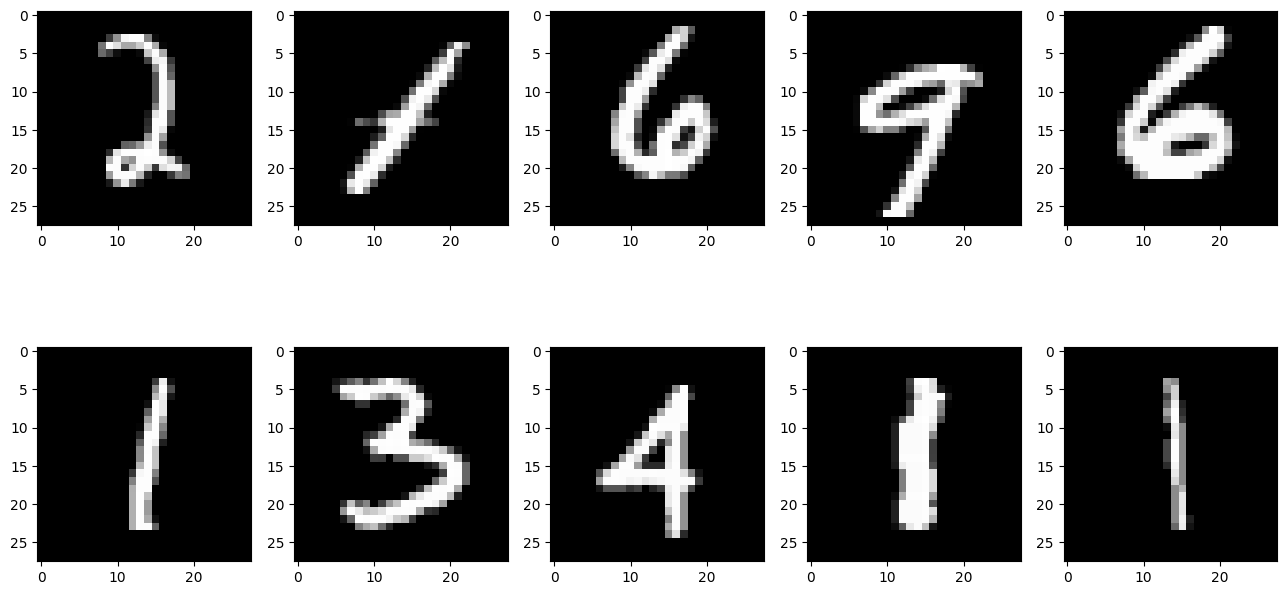

In [60]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_labels[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_images[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [61]:
# Load and preprocess data

train_images = train_images.reshape((60000, 784)).astype('float32') / 255
test_images = test_images.reshape((10000, 784)).astype('float32') / 255
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

Create the Model architecture

In [79]:

# Define model with regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [85]:
# Train model
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9741 - loss: 0.2141 - val_accuracy: 0.9733 - val_loss: 0.2176
Epoch 2/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9787 - loss: 0.1977 - val_accuracy: 0.9730 - val_loss: 0.2147
Epoch 3/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9775 - loss: 0.1912 - val_accuracy: 0.9685 - val_loss: 0.2246
Epoch 4/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9790 - loss: 0.1842 - val_accuracy: 0.9760 - val_loss: 0.1991
Epoch 5/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9777 - loss: 0.1841 - val_accuracy: 0.9800 - val_loss: 0.1862
Epoch 6/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9795 - loss: 0.1755 - val_accuracy: 0.9775 - val_loss: 0.1869
Epoch 7/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9818 - loss: 0.1677 - val_accuracy: 0.9778 - val_loss: 0.1866
Epoch 8/8
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9800 - loss: 0.1731 - val_a

Plot the loss and accuracy graphs

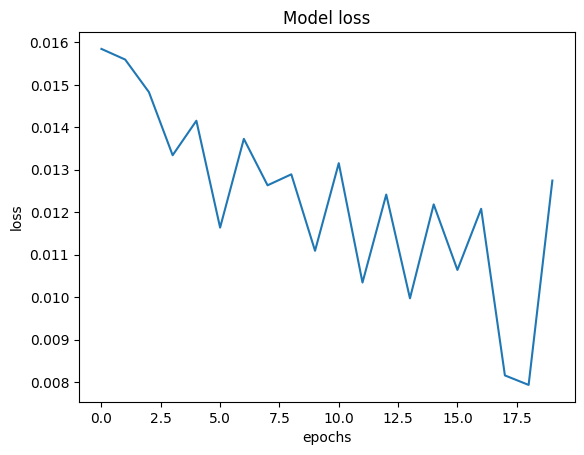

In [87]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

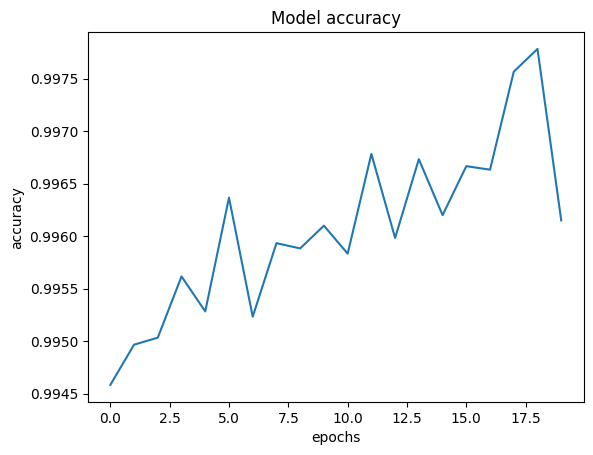

In [86]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [88]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss}\nTest Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.1987
Test Loss: 0.18416422605514526
Test Accuracy: 0.9750999808311462


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


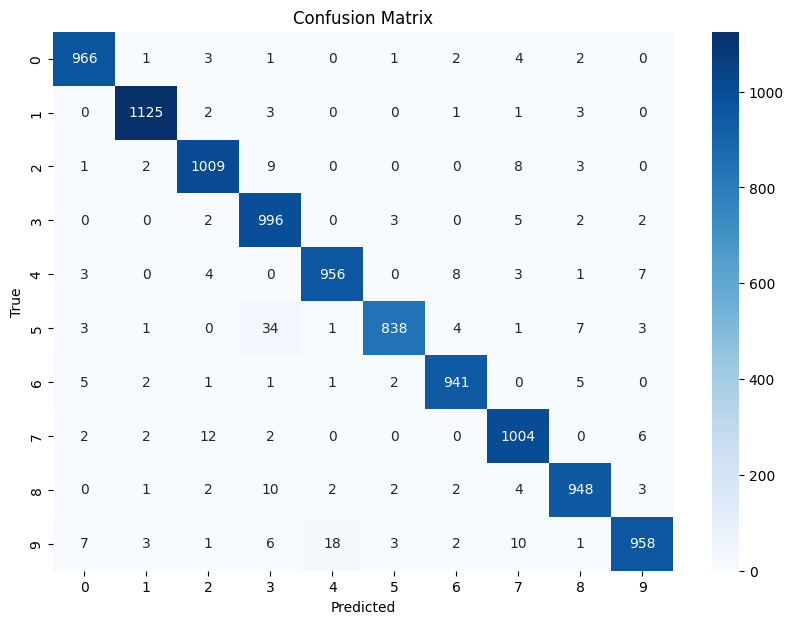

In [74]:
# Predict and plot confusion matrix
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Save the model weights

In [89]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')